# Goodness-of-fit test with Combine
Assuming background model is rejected events (fail VAE cut) miltiplied by some transfer factor (single number or function of dijet invariant mass)

In [3]:
!pip install mplhep --user

  Using cached https://files.pythonhosted.org/packages/29/c1/24814557f1d22c56d50280771a17307e6bf87b70727d975fd6b2ce6b014a/requests-2.25.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/23/fc/8a49991f7905261f9ca9df5aa9b58363c3c821ce3e7f671895442b7100f2/urllib3-1.26.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/38/928ddce2273eaa564f6f50de919327bf3a00f091b5baba8dfa9460f3a8a8/idna-2.10-py2.py3-none-any.whl
You are using pip version 9.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
# Imports
import os, sys
import numpy as np
import ROOT as rt
import uproot
import h5py
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.ROOT)

sys.path.append('../lib')

from histo_utilities import create_TH1D, create_Canvas, make_effiency_plot

/cvmfs/cms.cern.ch/slc7_amd64_gcc700/external/py2-root_numpy/4.7.3-gnimlf6/lib/python2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.16.6 is currently installed but you installed root_numpy against numpy 1.14.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


800000
84461
715539


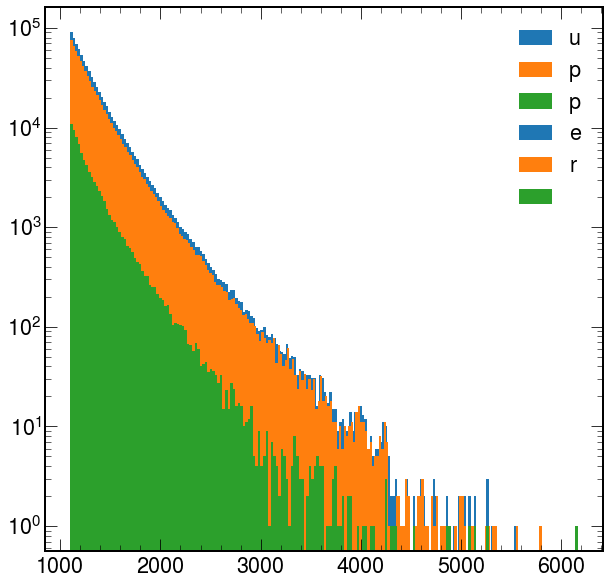

In [28]:
q = 0.1

SM_eff = q

columns   = {}
columns[0.9] = 17
columns[0.5] = 18
columns[0.1] = 19
columns[0.01]= 20

qcd_xsec = 8730000. # fb
qcd_gen_events = 0.75*10e3*1995 # 75% of qcd events are used
sig_xsec = 1000. # fb
sig_gen_events = 10e3*99. # all sig events are used
lumi = 1 # assuming 1/fb
sig_inj_vals = [0, 1, 2, 5, 10, 20, 50] # signal strengths to inject

path = '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/run_106/'

f_qcd = h5py.File(path+'qcd_sqrtshatTeV_13TeV_PU40_reco.h5', 'r')
f_sig = h5py.File(path+'RSGraviton_WW_NARROW_13TeV_PU40_3.5TeV_reco.h5', 'r')


qcd_tot = np.array(f_qcd.get("eventFeatures"))
qcd_acc = qcd_tot[qcd_tot[:,columns[q]] == 1]
qcd_rej = qcd_tot[qcd_tot[:,columns[q]] == 0] 

sig_tot = np.array(f_sig.get("eventFeatures"))
sig_acc = sig_tot[sig_tot[:,columns[q]] == 1]
sig_rej = sig_tot[sig_tot[:,columns[q]] == 0] 

qcd_tot, qcd_acc, qcd_rej = qcd_tot[:,0], qcd_acc[:,0], qcd_rej[:,0]
sig_tot, sig_acc, sig_rej = sig_tot[:,0], sig_acc[:,0], sig_rej[:,0]
print(qcd_tot.shape[0])
print(qcd_acc.shape[0])
print(qcd_rej.shape[0])
plt.clf()
plt.hist(qcd_tot,bins=200,label='Total')
plt.hist(qcd_rej,bins=200,label='Rejected')
plt.hist(qcd_acc,bins=200,label='Accepted')
plt.legend('upper right')
plt.yscale('log')
# qcd_tot = qcd_tot*qcd_xsec*lumi/qcd_gen_events
# qcd_acc = qcd_acc*qcd_xsec*lumi/qcd_gen_events
# qcd_rej = qcd_rej*qcd_xsec*lumi/qcd_gen_events
# sig_tot = sig_tot*sig_xsec*lumi/sig_gen_events
# sig_acc = sig_acc*sig_xsec*lumi/sig_gen_events
# sig_rej = sig_rej*sig_xsec*lumi/sig_gen_events

bin_edges = np.array([1126,1181,1246,1313,1383,1455,1530,
                      1607,1687,1770,1856,1945,2037,2132,
                      2231,2332,2438,2546,2659,2775,2895,
                      3019,3147,3279,3416,3558,3704,3854,
                      4010,4171,4337,4509,4686,4869,5058,
                      5253,5500,5663,5877,6099,6328,6564,6808])

n_bins = len(bin_edges)-1
max_bin = bin_edges[-1]
min_bin = bin_edges[0]


In [21]:
# prepare histograms and scale
background_hist_acc = rt.TH1D('background_acc','background_acc', n_bins, min_bin, max_bin)
for i, b in enumerate(qcd_acc):
    print(b)
    background_hist_acc.SetBinContent(i+1, b)
    data_hist_acc.SetBinContent(i+1, b)

[ 1.1517749e+03  4.8902063e+02 -1.8802396e+00  1.6709048e+00
  1.4797681e+02  1.6467466e+03  4.8483527e+02 -2.9639479e+01
  6.1796716e+02 -1.1533072e+00 -3.0903940e+00  3.9348266e-01
  3.6736965e-01  2.6113009e+00  4.3273243e-01  4.0360838e-01
  2.9124057e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  0.0000000e+00]


TypeError: none of the 3 overloaded methods succeeded. Full details:
  void TH1::SetBinContent(int bin, double content) =>
    could not convert argument 2 (only size-1 arrays can be converted to Python scalars)
  void TH1::SetBinContent(int bin, int, double content) =>
    takes at least 3 arguments (2 given)
  void TH1::SetBinContent(int bin, int, int, double content) =>
    takes at least 4 arguments (2 given)

Warning in <TROOT::Append>: Replacing existing TH1: background_acc (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


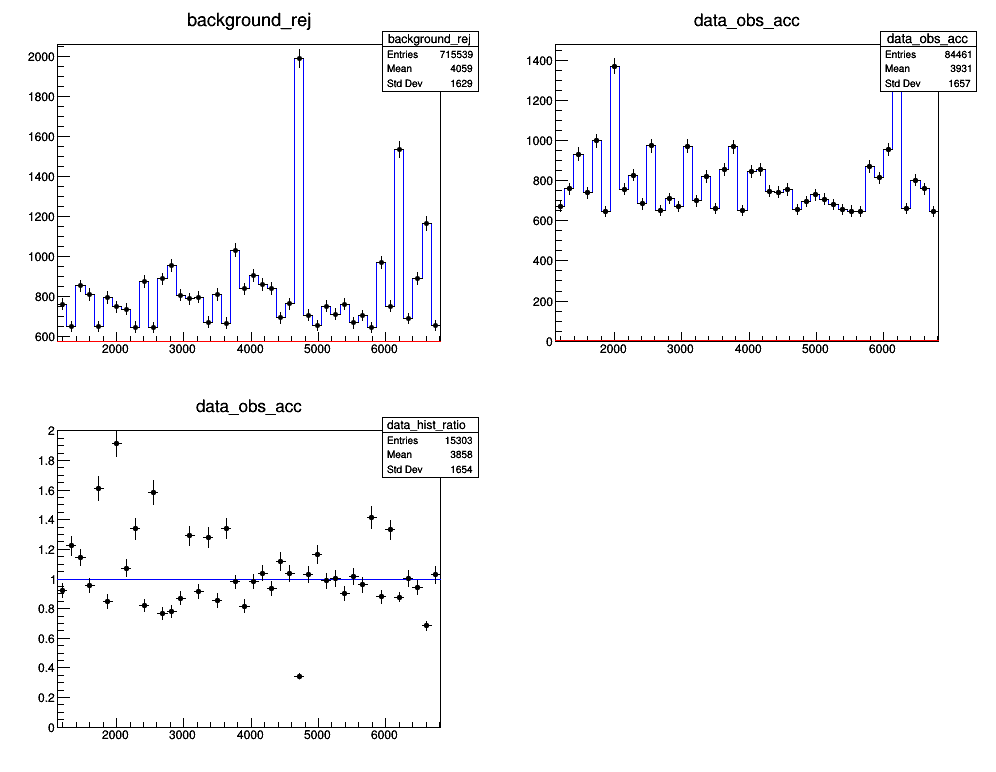

In [13]:
# plot background, signal, data
c = rt.TCanvas('c','c',1000,800)
c.Divide(2,2)

c.cd(1)
data_hist_rej.Draw('pez')
background_hist_rej.SetLineColor(rt.kBlue)
background_hist_rej.Draw('hist')
signal_hist_rej.SetLineColor(rt.kRed)
signal_hist_rej.Draw('histsame')
data_hist_rej.SetLineColor(rt.kBlack)
data_hist_rej.SetMarkerColor(rt.kBlack)
data_hist_rej.SetMarkerStyle(20)
data_hist_rej.SetMarkerSize(0.5)
data_hist_rej.Draw('pezsame')

c.cd(2)
data_hist_acc.Draw('pez')
data_hist_acc.SetMinimum(0)
signal_hist_acc.SetLineColor(rt.kRed)
signal_hist_acc.Draw('histsame')
background_hist_acc.SetLineColor(rt.kBlue)
background_hist_acc.Draw('histsame')

data_hist_acc.SetLineColor(rt.kBlack)
data_hist_acc.SetMarkerColor(rt.kBlack)
data_hist_acc.SetMarkerStyle(20)
data_hist_acc.SetMarkerSize(0.5)
data_hist_acc.Draw('pezsame')

c.cd(3)
data_hist_acc.Sumw2()
data_hist_ratio = data_hist_acc.Clone('data_hist_ratio')
data_hist_rej.Sumw2()
data_hist_ratio.Divide(data_hist_rej)
data_hist_ratio.Scale(data_hist_rej.Integral()/data_hist_acc.Integral())
data_hist_ratio.Draw('pez')
data_hist_ratio.SetMaximum(2)
data_hist_ratio.SetMinimum(0)
tline = rt.TLine(min_bin, 1, max_bin, 1)
tline.SetLineColor(rt.kBlue)
tline.Draw()
data_hist_ratio.Draw('pezsame')
c.Draw()